# PCA
  
The new features PCA constructs are actually just linear combinations (weighted sums) of the original features.  
These new features are called the principal components of the data. The weights themselves are called loadings. There will be as many principal components as there are features in the original dataset: if we had used ten features instead of two, we would have ended up with ten components.

 - PCA only works with numeric features, like continuous quantities or counts.
 - PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

'''
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
'''

'\nplt.style.use("seaborn-whitegrid")\nplt.rc("figure", autolayout=True)\nplt.rc(\n    "axes",\n    labelweight="bold",\n    labelsize="large",\n    titleweight="bold",\n    titlesize=14,\n    titlepad=10,\n)\n\n\ndef plot_variance(pca, width=8, dpi=100):\n    # Create figure\n    fig, axs = plt.subplots(1, 2)\n    n = pca.n_components_\n    grid = np.arange(1, n + 1)\n    # Explained variance\n    evr = pca.explained_variance_ratio_\n    axs[0].bar(grid, evr)\n    axs[0].set(\n        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)\n    )\n    # Cumulative Variance\n    cv = np.cumsum(evr)\n    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")\n    axs[1].set(\n        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)\n    )\n    # Set up figure\n    fig.set(figwidth=8, dpi=100)\n    return axs\n\ndef make_mi_scores(X, y, discrete_features):\n    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)\n    mi_scores = pd.Series(mi

In [9]:
df= pd.read_csv('D:/projects/XAI-finance2/dataset/HELOC1-2.csv')
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NumTradesOpeninLast12M,PercentInstallTrades,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,1,43,0,0,33,76,8,1,1,69
1,0,61,58,15,41,2,4,4,100,200,...,0,67,0,0,0,71,0,2,0,0
2,0,67,66,5,24,9,0,0,100,200,...,4,44,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,3,57,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,200,...,0,25,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,5,19,0,0,26,73,5,2,0,100
9857,0,65,147,39,68,11,0,0,92,28,...,0,42,1,1,86,53,2,2,1,80
9858,0,74,129,6,64,18,1,1,100,200,...,1,33,4,4,6,67,5,3,0,56
9859,0,72,234,12,113,42,2,2,96,35,...,0,20,0,0,19,65,4,1,0,38


In [10]:
#Removing Categorical features
#df=df.drop(['MaxDelq2PublicRecLast12M', 'MaxDelqEver'], axis=1)


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('RiskPerformance', axis=1)  
y = df['RiskPerformance'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2020, stratify=y)

In [12]:
#scaling the data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))


1.0

In [20]:

y_pred = rfc.predict(X_test_scaled)
# y_predf = y_pred[:,1]>0.5
# acc = np.sum(np.logical_not(np.logical_xor(y_test, y_predf)))/len(y_test)
# print("Accuracy: ", acc)
recall_score(y_test, y_pred)

0.7106652587117213

### Corelation plot

In [7]:
sns.heatmap(df, annot=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Khushali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-365db0cdff03>", line 1, in <module>
    sns.heatmap(df, annot=True)
  File "C:\Users\Khushali\anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\Users\Khushali\anaconda3\lib\site-packages\seaborn\matrix.py", line 548, in heatmap
    plotter.plot(ax, cbar_ax, kwargs)
  File "C:\Users\Khushali\anaconda3\lib\site-packages\seaborn\matrix.py", line 343, in plot
    self._annotate_heatmap(ax, mesh)
  File "C:\Users\Khushali\anaconda3\lib\site-packages\seaborn\matrix.py", line 255, in _annotate_heatmap
    ax.text(x, y, annotation, **text_kwargs)
  File "C:\Users\Khushali\anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 766, in text
    t.set_clip_path(self.patch)
  File "C:\Users\Khushali\anaconda3\lib\s

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x000001B0750F8E50> (for post_execute):


KeyboardInterrupt: 

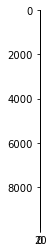

In [6]:
import matplotlib.pyplot as plt
import numpy as np
data_np=df.to_numpy()
plt.imshow(data_np, cmap='hot', interpolation='nearest')
plt.show()

## PCA

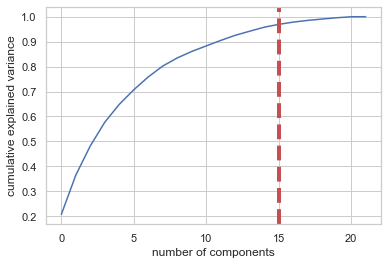

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.207664,0.207664
1,0.365301,0.157636
2,0.482441,0.117140
3,0.577257,0.094816
4,0.648796,0.071539
5,0.707117,0.058321
6,0.758761,0.051644
7,0.802298,0.043537
8,0.834830,0.032531
9,0.860704,0.025874


In [21]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=22)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(15))

Looking at the dataframe above, when we use PCA to reduce our 22 predicting variables down to 15 components, we can still explain over 95% of the variance. The other components explain less than 5% of the variance, so we can cut them. Using this logic, we will use PCA to reduce the number of components from 22 to 15 for X_train and X_test.

In [22]:
pca = PCA(n_components=15)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [23]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=df.columns[1:], index=pca_dims)
pca_test_df.head(15).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,PCA Component 10,PCA Component 11,PCA Component 12,PCA Component 13,PCA Component 14
ExternalRiskEstimate,-0.404671,-0.122892,-0.060006,0.120199,-0.042293,0.096653,0.060387,0.034391,-0.038396,-0.024227,-0.052473,0.056543,-0.236294,-0.185177,-0.094544
MSinceOldestTradeOpen,-0.094401,-0.062315,-0.421982,-0.073245,0.138867,0.243133,0.038708,0.347544,-0.450098,0.013073,0.053055,-0.065924,0.179875,0.103270,0.014503
MSinceMostRecentTradeOpen,-0.043618,-0.285693,-0.029648,-0.168291,0.242417,0.275054,-0.020278,-0.065271,0.641221,0.403830,-0.046316,0.171632,0.259683,-0.101003,-0.091831
AverageMInFile,-0.100341,-0.199983,-0.388491,-0.126593,0.223345,0.291452,0.033547,0.254571,-0.098905,0.064364,0.043017,-0.016382,-0.014052,-0.076696,-0.014878
NumSatisfactoryTrades,-0.040629,0.332420,-0.399471,0.024439,-0.157247,0.055005,0.006819,-0.133459,0.210663,-0.171666,-0.084689,0.110680,0.031600,0.048956,-0.047880
NumTrades60Ever2DerogPubRec,0.314217,-0.166454,-0.109712,0.173294,0.003939,-0.023530,0.517317,-0.052879,0.003138,0.002663,0.043487,0.046114,-0.036775,0.039749,0.052042
NumTrades90Ever2DerogPubRec,0.276705,-0.154519,-0.086430,0.184166,0.004520,-0.031057,0.607643,-0.070470,0.022808,-0.011898,-0.050197,-0.092958,0.017062,-0.081008,-0.061946
PercentTradesNeverDelq,-0.329989,0.212799,0.042756,-0.023224,-0.047178,0.017274,0.187074,-0.048331,0.018872,-0.053481,-0.228253,-0.439672,0.100532,-0.424091,-0.495751
MSinceMostRecentDelq,-0.344921,0.087198,0.181288,-0.032670,0.065926,0.050468,0.434577,-0.044638,0.019460,0.029928,-0.017715,-0.084852,0.137122,0.224662,0.202261
MaxDelq2PublicRecLast12M,-0.325165,0.091966,0.164285,-0.043863,0.042345,0.076914,0.246889,0.005534,-0.073084,-0.047863,0.322920,0.633173,-0.332275,-0.104270,-0.127534


### Fitting the PCA dataset

In [24]:
rfc_2=RandomForestClassifier(random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100,300,500]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,4,10,20,24]
min_samples_leaf = [2,4,6,10]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc_2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_
# {'bootstrap': False,
# 'max_depth': 7,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 3,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 300 candidates, totalling 900 fits


KeyboardInterrupt: 

In [25]:
#from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, min_samples_split=10, max_depth=20) # MODEL WITH TUNED PARAMETERS
# clf = RandomForestClassifier(n_estimators=20) # n_estimators is the no. of trees in the random forest
rfc_2.fit(X_train_scaled_pca, y_train)
y_pred = rfc_2.predict_proba(X_test_scaled_pca)
y_predf = y_pred[:,1]>0.5

In [26]:
acc = np.sum(np.logical_not(np.logical_xor(y_test, y_predf)))/len(y_test)
print("Accuracy: ", acc)
print("Score: ", rfc_2.score(X_test_scaled_pca, y_test))
print("Classes: ", rfc_2.classes_)

Accuracy:  0.728839330968069
Score:  0.728839330968069
Classes:  [0 1]


In [27]:
recall_score(y_test, y_predf)

0.7148891235480465

In [31]:
X_train_scaled_pca

array([[-2.38083908,  2.63026534, -1.58268325, ...,  0.83555471,
         0.43588834, -0.08035435],
       [-0.29174745,  4.13965397, -1.02392104, ..., -0.24660976,
        -0.63585861,  1.15175581],
       [-2.83105126, -0.85911106, -0.72426551, ..., -0.49378774,
         0.30919615,  0.02380739],
       ...,
       [-1.64952079,  1.92557377, -0.98102703, ...,  0.81490024,
         0.45180932,  0.23149852],
       [-0.69142156, -1.39095723,  2.56181882, ...,  0.41390117,
         0.49819921, -0.88461442],
       [-1.24292356, -1.25969822, -0.26935317, ..., -0.32585713,
        -0.80217965, -0.0501286 ]])

## ICA

In [40]:
from sklearn.decomposition import FastICA
ica1 = FastICA(n_components=15, 
              max_iter=500, 
              random_state=1000)
X_train_ica=ica.fit_transform(X_train_scaled)
X_test_ica=ica.fit_transform(X_test_scaled)
# IndependentComponentValues=ICA.fit_transform(X)
# print(X_ica)

In [41]:
#from sklearn.ensemble import RandomForestClassifier
rfc_4 = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, min_samples_split=10, max_depth=20) # MODEL WITH TUNED PARAMETERS
# clf = RandomForestClassifier(n_estimators=20) # n_estimators is the no. of trees in the random forest
rfc_4.fit(X_train_ica, y_train)
y_pred = rfc_4.predict_proba(X_test_ica)
y_predf = y_pred[:,1]>0.5

In [42]:
acc = np.sum(np.logical_not(np.logical_xor(y_test, y_predf)))/len(y_test)
print("Accuracy: ", acc)
print("Score: ", rfc_3.score(X_test_ica, y_test))
print("Classes: ", rfc_3.classes_)

Accuracy:  0.5803345159655348
Score:  0.4809934110491637
Classes:  [0 1]


# PCA - ICA combined

In [36]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=15, 
              max_iter=500, 
              random_state=1000)
X_train_ica=ica.fit_transform(X_train_scaled_pca)
X_test_ica=ica.fit_transform(X_test_scaled_pca)
# IndependentComponentValues=ICA.fit_transform(X)
# print(X_ica)

In [37]:
#from sklearn.ensemble import RandomForestClassifier
rfc_3 = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, min_samples_split=10, max_depth=20) # MODEL WITH TUNED PARAMETERS
# clf = RandomForestClassifier(n_estimators=20) # n_estimators is the no. of trees in the random forest
rfc_3.fit(X_train_ica, y_train)
y_pred = rfc_3.predict_proba(X_test_ica)
y_predf = y_pred[:,1]>0.5

In [39]:
acc = np.sum(np.logical_not(np.logical_xor(y_test, y_predf)))/len(y_test)
print("Accuracy: ", acc)
print("Score: ", rfc_3.score(X_test_ica, y_test))
print("Classes: ", rfc_3.classes_)

Accuracy:  0.5250886974151039
Score:  0.5250886974151039
Classes:  [0 1]
